# Simple neural network for a function in PyTorch

See the [PyTorch website](https://pytorch.org/) for tutorials and other documentation. 
In this notebook we'll rely on ChatGPT 4 to generate code for a PyTorch neural network for a function of a single variable.
Other than the questions to ChatGPT, all code and documentation was provided by ChatGPT. (Slight tweaks were made to change the format of the output from training and to increase the range of the trained function to test extrapolation.)

## Installation of PyTorch

To install PyTorch via Anaconda, use the following conda command:

`conda install pytorch torchvision -c pytorch`


### Verification of PyTorch installation (suggested in PyTorch website)

In [1]:
import torch
x = torch.rand(5, 3)
print(x)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
tensor([[0.5615, 0.2720, 0.9393],
        [0.0190, 0.8747, 0.4342],
        [0.1262, 0.5377, 0.7791],
        [0.1908, 0.5040, 0.2022],
        [0.9125, 0.6241, 0.1369]])


Result should be similar to (but not the same; these are random numbers!):

    tensor([[0.3380, 0.3845, 0.3217],
            [0.8337, 0.9050, 0.2650],
            [0.2979, 0.7141, 0.9069],
            [0.1449, 0.1132, 0.1375],
            [0.4675, 0.3947, 0.1426]])

## Telling ChatGPT 4 to make a network for a function of one variable

**To ChatGPT:** *Write a neural network in PyTorch to learn a function of one variable. It should have three hidden layers, each with a width of 10 neutrons.*

To create a neural network in PyTorch with the specifications you described, we'll first need to import the necessary modules from PyTorch, particularly torch and torch.nn. The network will consist of three hidden layers, each with 10 neurons, and since it's for learning a function of one variable, the input and output layers will each have one neuron.

Here’s how you can define such a network using PyTorch:

In [2]:
import torch
import torch.nn as nn

# Define the neural network class inheriting from nn.Module
class OneVariableNet(nn.Module):
    def __init__(self):
        super(OneVariableNet, self).__init__()
        # Define the first hidden layer (input layer to first hidden layer)
        self.hidden1 = nn.Linear(1, 10)  # 1 input, 10 outputs
        # Define the second hidden layer
        self.hidden2 = nn.Linear(10, 10) # 10 inputs, 10 outputs
        # Define the third hidden layer
        self.hidden3 = nn.Linear(10, 10) # 10 inputs, 10 outputs
        # Define the output layer
        self.output = nn.Linear(10, 1)   # 10 inputs, 1 output

        # Define activation function, you can use others like ReLU or LeakyReLU
        self.activation = nn.Tanh()

    def forward(self, x):
        # Forward pass through each layer
        x = self.activation(self.hidden1(x))
        x = self.activation(self.hidden2(x))
        x = self.activation(self.hidden3(x))
        x = self.output(x)
        return x

# Create an instance of the network
net = OneVariableNet()

# Print the network structure
print(net)


OneVariableNet(
  (hidden1): Linear(in_features=1, out_features=10, bias=True)
  (hidden2): Linear(in_features=10, out_features=10, bias=True)
  (hidden3): Linear(in_features=10, out_features=10, bias=True)
  (output): Linear(in_features=10, out_features=1, bias=True)
  (activation): Tanh()
)


**Explanation:**
1. **Network Structure:** This network begins with an input layer that accepts a single feature (since it's a function of one variable). It then passes through three hidden layers, each with 10 neurons, and finally outputs a single value, which is typical for regression tasks.

1. **Activation Function:** I used the Tanh activation function for the hidden layers, which helps introduce non-linearity to the model, allowing it to learn more complex patterns. You can substitute this with other functions like ReLU if preferred, which might offer benefits in terms of training speed and avoiding vanishing gradients in some cases.

1. **Output Layer:** The final output layer does not use an activation function since we're presumably predicting a continuous variable (regression task). If you're working on a classification task, you might need a suitable activation function like sigmoid or softmax for binary or multi-class classification, respectively.

1. **Initialization and Usage:** After defining the network, you can create an instance and use it for training or inference as needed. Training this network would involve defining a loss function and an optimizer, then running a training loop to fit the model to your data.

This setup should work well for basic experiments and learning purposes. If you want to train this model on actual data, you’ll need to set up a training loop with loss computation and optimization steps.

## Now ask ChatGPT to use this code to learn a specified function in a specified region

**To ChatGPT:** *Write code to use this code to learn the function `f(x) = sin(x)**2` from x = 0 to x = 2, with 20 randomly spaced training points. Then test it with 50 equally spaced testing points.*

To accomplish the task of training a neural network on the function `f(x) = sin(x)**2` and testing it on new data points, we'll follow these steps:

1. Data Preparation: Generate training data and testing data as specified.
1. Network Training: Implement the training loop using a suitable optimizer and loss function.
1. Testing: Evaluate the network on the testing data and possibly visualize the results.

First, we'll need to define our dataset. We'll generate 20 random training points in the range [0, 2] and 50 equally spaced testing points in the same range.

Here's the complete code to do this, including both training and testing phases:

Epoch [100/2000], Loss: 3.2858e-04
Epoch [200/2000], Loss: 2.7336e-04
Epoch [300/2000], Loss: 1.8517e-04
Epoch [400/2000], Loss: 6.7945e-05
Epoch [500/2000], Loss: 1.2013e-05
Epoch [600/2000], Loss: 8.5314e-06
Epoch [700/2000], Loss: 8.2068e-06
Epoch [800/2000], Loss: 7.8656e-06
Epoch [900/2000], Loss: 7.4902e-06
Epoch [1000/2000], Loss: 7.0791e-06
Epoch [1100/2000], Loss: 6.6314e-06
Epoch [1200/2000], Loss: 6.1459e-06
Epoch [1300/2000], Loss: 5.6234e-06
Epoch [1400/2000], Loss: 5.0656e-06
Epoch [1500/2000], Loss: 4.9311e-06
Epoch [1600/2000], Loss: 4.2052e-06
Epoch [1700/2000], Loss: 3.6394e-06
Epoch [1800/2000], Loss: 3.8547e-06
Epoch [1900/2000], Loss: 3.0755e-06
Epoch [2000/2000], Loss: 2.5704e-06


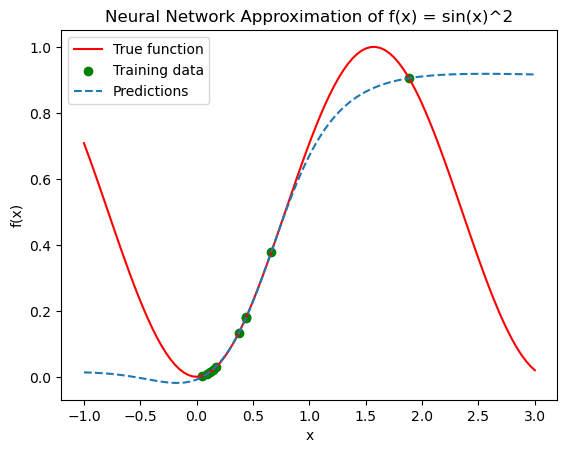

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

class OneVariableNet(nn.Module):
    def __init__(self):
        super(OneVariableNet, self).__init__()
        self.hidden1 = nn.Linear(1, 10)
        self.hidden2 = nn.Linear(10, 10)
        self.hidden3 = nn.Linear(10, 10)
        self.output = nn.Linear(10, 1)
        self.activation = nn.Tanh()

    def forward(self, x):
        x = self.activation(self.hidden1(x))
        x = self.activation(self.hidden2(x))
        x = self.activation(self.hidden3(x))
        x = self.output(x)
        return x

# Create an instance of the network
net = OneVariableNet()

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=0.01)

# Generate training data
x_train = 2 * torch.rand(10, 1)  # Randomly spaced points
y_train = torch.sin(x_train)**2  # f(x) = sin(x)^2

# Training loop
epochs = 2000
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = net(x_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4e}')

# Generate testing data
x_test = torch.linspace(-1, 3, 100).unsqueeze(1)  # Equally spaced points
y_test = torch.sin(x_test)**2  # f(x) = sin(x)^2
with torch.no_grad():
    predictions = net(x_test)

# Plot the results
plt.plot(x_test.numpy(), y_test.numpy(), label='True function', color='r')
plt.scatter(x_train.numpy(), y_train.numpy(), label='Training data', color='g')
plt.plot(x_test.numpy(), predictions.numpy(), label='Predictions', linestyle='--')
plt.legend()
plt.title('Neural Network Approximation of f(x) = sin(x)^2')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()


**Explanation:**
* **Network Setup:** The neural network is set up as defined previously.
* **Data Generation:** Random training data is generated within the specified range and the function values are computed as `sin(x)**2` 
* **Training Process:** The network is trained using the Adam optimizer and mean squared error (MSE) loss function over 2000 epochs. Adjustments can be made to the learning rate or number of epochs based on how the loss progresses.
* **Testing and Visualization:** The network's predictions are generated for the testing dataset and plotted against the true function values. The training data is also plotted to show how well the network learned to approximate the function within the training range.

This code should provide a clear demonstration of how well the neural network can learn and generalize the function `f(x) = sin(x)**2`.


**To ChatGPT:** *Explain each of the steps in the for loop over epochs.*

In the neural network training code that uses the `OneVariableNet`, the for-loop over epochs is a critical part where the actual training of the model takes place. Let's break down each step inside this training loop to understand how the model is trained epoch by epoch:

```python
epochs = 2000
for epoch in range(epochs):
    optimizer.zero_grad()  # Step 1
    outputs = net(x_train)  # Step 2
    loss = criterion(outputs, y_train)  # Step 3
    loss.backward()  # Step 4
    optimizer.step()  # Step 5
    
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')
```

### Detailed Explanation of Each Step:

1. **Zero the gradients (`optimizer.zero_grad()`)**:
    - **Purpose**: Before the new forward pass, you need to zero out the gradients from the previous pass, because PyTorch accumulates gradients on subsequent backward passes. If this is not done, you would be accumulating gradients across epochs which generally is not desired (except in specific cases).
    - **Effect**: This resets the gradient of all model parameters to zero, ensuring that the backpropagation of this pass starts with a clean slate.

2. **Perform a forward pass (`outputs = net(x_train)`)**:
    - **Purpose**: This computes the predicted outputs (`outputs`) for the given input data (`x_train`). It involves passing the data through the network and calculating the output of each layer sequentially until the final layer.
    - **Effect**: The model uses its current state (weights and biases) to predict the output based on the input data.

3. **Calculate the loss (`loss = criterion(outputs, y_train)`)**:
    - **Purpose**: After obtaining the predictions, this step computes the loss, which is a measure of how far the network's predictions are from the actual target values (`y_train`). The loss function used here is the Mean Squared Error Loss (MSE), which is typical for regression tasks.
    - **Effect**: The calculated loss provides a quantitative measure of the model’s performance. A lower loss indicates better model predictions.

4. **Backward pass to compute gradients (`loss.backward()`)**:
    - **Purpose**: This step involves backpropagation. By calling `backward()` on the loss tensor, gradients are computed for every model parameter (weights and biases) that has `requires_grad=True`. This is done by tracing the loss back through the network, calculating the gradient of the loss with respect to each parameter.
    - **Effect**: Updates the gradient of each parameter. These gradients will guide how the weights should be changed to minimize the loss.

5. **Update the weights (`optimizer.step()`)**:
    - **Purpose**: This step applies the gradients to adjust the weights of the network. The specific way the weights are updated depends on the optimizer used (Adam, in this case). Adam adjusts the learning rate dynamically for each parameter.
    - **Effect**: Updates the model’s weights to potentially lower the loss in subsequent epochs. This is where the model learns by incrementally improving its predictions.

6. **Printing the loss (Optional Debugging/Logging)**:
    - **Purpose**: Regularly printing the loss gives you insight into how well the training is progressing. By observing the loss decrease over epochs, you can gauge the effectiveness of your training loop and hyperparameters.
    - **Effect**: Helps in monitoring the training process and deciding when the model has sufficiently learned or if there might be issues like overfitting or underfitting.

This loop is executed for a fixed number of iterations (`epochs`), and each iteration of this loop is intended to incrementally improve the model's performance by adjusting its parameters based on the calculated loss and its gradients.

**To ChatGPT:** *What is the same code with a ReLu activation function?*

To modify the previously described neural network so that it uses the ReLU (Rectified Linear Unit) activation function instead of the Tanh activation function, you simply need to replace the Tanh activation instances with ReLU in the network definition. ReLU is often preferred in deep networks due to its simplicity and effectiveness at avoiding vanishing gradient issues.

Here's how you can update the code to use ReLU:

Epoch [100/2000], Loss: 6.1790e-03
Epoch [200/2000], Loss: 3.4570e-03
Epoch [300/2000], Loss: 1.1190e-03
Epoch [400/2000], Loss: 1.2028e-04
Epoch [500/2000], Loss: 3.3466e-05
Epoch [600/2000], Loss: 2.3432e-05
Epoch [700/2000], Loss: 1.8515e-05
Epoch [800/2000], Loss: 1.5891e-05
Epoch [900/2000], Loss: 1.4590e-05
Epoch [1000/2000], Loss: 1.4417e-05
Epoch [1100/2000], Loss: 1.3306e-05
Epoch [1200/2000], Loss: 1.3677e-05
Epoch [1300/2000], Loss: 8.0134e-05
Epoch [1400/2000], Loss: 1.8765e-05
Epoch [1500/2000], Loss: 1.1920e-05
Epoch [1600/2000], Loss: 1.5252e-05
Epoch [1700/2000], Loss: 1.1425e-05
Epoch [1800/2000], Loss: 8.4948e-06
Epoch [1900/2000], Loss: 6.3999e-06
Epoch [2000/2000], Loss: 1.1099e-05


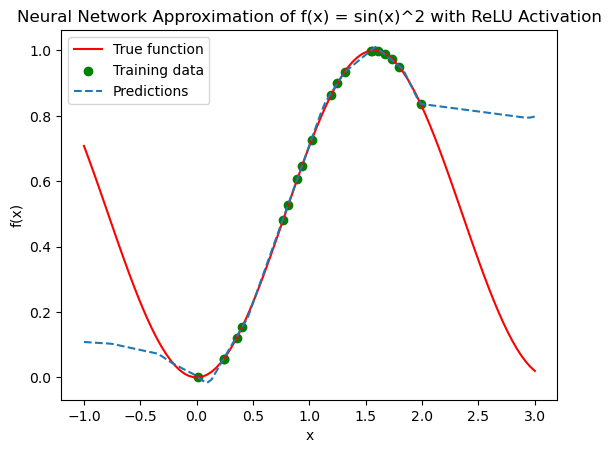

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

class OneVariableNet(nn.Module):
    def __init__(self):
        super(OneVariableNet, self).__init__()
        self.hidden1 = nn.Linear(1, 10)
        self.hidden2 = nn.Linear(10, 10)
        self.hidden3 = nn.Linear(10, 10)
        self.output = nn.Linear(10, 1)
        self.activation = nn.ReLU()  # Changed from nn.Tanh() to nn.ReLU()

    def forward(self, x):
        x = self.activation(self.hidden1(x))
        x = self.activation(self.hidden2(x))
        x = self.activation(self.hidden3(x))
        x = self.output(x)
        return x

# Create an instance of the network
net = OneVariableNet()

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=0.01)

# Generate training data
x_train = 2 * torch.rand(20, 1)  # Randomly spaced points
y_train = torch.sin(x_train)**2  # f(x) = sin(x)^2

# Training loop
epochs = 2000
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = net(x_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4e}')

# Generate testing data
x_test = torch.linspace(-1, 3, 100).unsqueeze(1)  # Equally spaced points
#x_test = torch.linspace(0, 2, 50).unsqueeze(1)  # Equally spaced points
y_test = torch.sin(x_test)**2  # f(x) = sin(x)^2
with torch.no_grad():
    predictions = net(x_test)

# Plot the results
plt.plot(x_test.numpy(), y_test.numpy(), label='True function', color='r')
plt.scatter(x_train.numpy(), y_train.numpy(), label='Training data', color='g')
plt.plot(x_test.numpy(), predictions.numpy(), label='Predictions', linestyle='--')
plt.legend()
plt.title('Neural Network Approximation of f(x) = sin(x)^2 with ReLU Activation')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()


**Changes and Considerations:**
* **Activation Function:** We replaced `nn.Tanh()` with `nn.ReLU()`. ReLU activation function might result in different learning characteristics, particularly in how the network fits non-linear functions like `sin(x)**2`.
ReLU provides linear responses for positive values and zero for negative values, which might affect how well it models the curve compared to Tanh.
* Learning Characteristics: Networks with ReLU activation might learn faster in some cases due to simpler gradient computations. However, in cases where the function involves negative inputs or outputs that need modeling around zero, Tanh might capture dynamics better because of its symmetric behavior around zero.

This updated code uses ReLU, and you might observe different results in how the model learns and generalizes the function `f(x) = sin(x)**2`. 
Experimenting with different activation functions can provide insights into their impact on model performance and behavior.

## Information from ChatGPT about backpropagation

**To ChatGPT:** *What algorithm is being used for backpropagation?*

In the provided code, the algorithm being used for backpropagation is not explicitly specified because it's inherently handled by PyTorch's automatic differentiation engine, which is built into the `backward()` function. However, the optimization algorithm that leverages this backpropagation to update the weights is Adam (Adaptive Moment Estimation).

Here's a breakdown of the key components:

**Automatic Differentiation**
* **Automatic Differentiation:** PyTorch uses a mechanism known as automatic differentiation to compute gradients. This is performed by the `backward()` method on the final loss tensor. This method calculates the gradients of the loss with respect to all tensors that have `requires_grad=True`. These tensors typically represent the weights and biases of the model.
* **Backpropagation:** Under the hood, when you call `loss.backward()`, PyTorch computes the gradient of the loss with respect to all parameters (weights) in the network by tracing back from the loss through the computational graph. Each operation in the graph has a predefined way of calculating gradients in a backward pass, effectively implementing the chain rule. This process is a practical implementation of the backpropagation algorithm.

**Optimization Algorithm**
* **Adam Optimizer:** The optimizer used here, `optim.Adam`, is an algorithm for first-order gradient-based optimization of stochastic objective functions, based on adaptive estimates of lower-order moments. Adam combines the advantages of two other extensions of stochastic gradient descent, specifically:
    * Adaptive Gradient Algorithm (AdaGrad) that maintains a per-parameter learning rate that improves performance on problems with sparse gradients (like natural language and computer vision problems).
    * Root Mean Square Propagation (RMSProp) that also maintains per-parameter learning rates that are adapted based on the average of recent magnitudes of the gradients for the weight (this means it works well on online and non-stationary problems).

**Why Adam?**
* **Efficiency:** Adam is computationally efficient and has little memory requirement.
* **Adaptive Learning Rate:** It handles sparse gradients on noisy problems very well.
* **Suitability for Problems:** Adam is generally well suited for problems that are large in terms of data and/or parameters.
* **Hyperparameters:** It has few hyperparameters that require tuning (like the learning rate, the exponential decay rates for the moment estimates).
  
In essence, while the backpropagation algorithm is the method used to compute the gradients, Adam is the algorithm that uses these gradients to update the weights iteratively in order to minimize the loss function.

## Information from ChatGPT about tensor operations 

**To ChatGPT:** *How do you write mathematical expressions using pytensor?*

In PyTorch, writing mathematical expressions involves using a combination of PyTorch's tensor operations, which are very similar to those found in NumPy but are optimized for automatic differentiation and can run on GPUs. Here’s how you can utilize PyTorch to handle various mathematical expressions:

### Basic Mathematical Operations
Here are some basic operations:

1. **Addition**

In [5]:
import torch
a = torch.tensor([1, 2, 3])
b = torch.tensor([4, 5, 6])
c = a + b  # Element-wise addition
print(c)

tensor([5, 7, 9])


2. **Subtraction**

In [6]:
d = b - a  # Element-wise subtraction
print(d)

tensor([3, 3, 3])


3. **Multiplication** (element-wise)

In [7]:
e = a * b  # Element-wise multiplication
print(e)

tensor([ 4, 10, 18])


4. **Division**

In [8]:
f = b / a  # Element-wise division
print(f)

tensor([4.0000, 2.5000, 2.0000])


5. **Matrix multiplication**

In [9]:
x = torch.tensor([[1, 2], [3, 4]])
y = torch.tensor([[5, 6], [7, 8]])
z = torch.matmul(x, y)  # Matrix multiplication
# or using the "@" operator
z = x @ y
print(z)

tensor([[19, 22],
        [43, 50]])


### Complex Expressions
For more complex mathematical expressions, such as those involving powers, roots, logarithms, trigonometric functions, 
and other operations, PyTorch provides a wide range of functions:

In [10]:
import torch

x = torch.tensor([1, 2, 3], dtype=torch.float32)

# Power
x_squared = x.pow(2)  # or x ** 2

# Square root
x_sqrt = torch.sqrt(x)

# Exponential
x_exp = torch.exp(x)

# Logarithm
x_log = torch.log(x)

# Trigonometric functions
x_sin = torch.sin(x)
x_cos = torch.cos(x)

# Hyperbolic functions
x_sinh = torch.sinh(x)
x_cosh = torch.cosh(x)


### Example of a Complex Expression
If you want to compute something more complex, like the following expression:

$$f(x) = \sin(x^2) + \log(x) \cdot \cos(x)$$

Here's how you would implement it in PyTorch:

In [11]:
import torch

# Assuming x is a tensor of positive numbers
x = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)

# Compute the function
f = torch.sin(x**2) + torch.log(x) * torch.cos(x)
print(f)

tensor([ 0.8415, -1.0453, -0.6755], grad_fn=<AddBackward0>)


### Gradient Computations
A key feature of PyTorch is its ability to automatically compute derivatives, which is crucial for machine learning algorithms like backpropagation. Here's how you can compute the gradient of $f$ with respect to $x$:

In [12]:
f.sum().backward()  # Compute the gradients (derivative of sum of f wrt x)
print(x.grad)       # Access the gradients


tensor([ 1.6209, -3.4529, -5.9518])


This example assumes that f is not a scalar, so we use f.sum() to create a scalar context for backward(), which computes the total derivative.

### Utilizing GPU Acceleration
To leverage GPU acceleration, you would typically move your tensors and models to the GPU:

In [13]:
if torch.cuda.is_available():
    x = x.to('cuda')
    # Perform your operations on x here

This approach to writing mathematical expressions in PyTorch enables both flexibility and powerful integration with deep learning models, allowing for both simple and advanced computations, all while being able to backpropagate errors through complex computational graphs efficiently.

## Information from ChatGPT about tensor operations 

**To ChatGPT:** *How are these neural networks initialized?*

Neural networks in frameworks like PyTorch and TensorFlow are initialized using specific strategies for setting the initial weights and biases of the network before training begins. Proper initialization is crucial because it can significantly affect the convergence and performance of the network during training.

### Common Initialization Methods
Here are some of the most common methods used for initializing neural networks:

1. **Zero Initialization:**
    * Weights and biases are set to zero.
    * Generally not recommended except for biases because it can lead to problems where neurons in the same layer learn the same features during training (symmetry breaking issue).

2. **Random Initialization:**
    * Weights are set to small random values, often drawn from a normal or uniform distribution.
    * Helps in breaking symmetry so that each neuron can learn different things.
    * Too small values can lead to the vanishing gradients problem, and too large values can lead to exploding gradients.
  
3. **Uniform and Normal Distribution:**
    * **Uniform Distribution:** Weights are initialized uniformly at random within a specified range (e.g., $[-y, y]$ where $y$ is a small value).
    * **Normal Distribution:** Weights are initialized according to a Gaussian distribution, usually with a mean of 0 and a small standard deviation.
      
4. **Xavier/Glorot Initialization:**
    * Designed specifically for keeping the scale of gradients roughly the same in all layers.
    * For a layer with $n_{\rm in}$ inputs and $n_{\rm out}$ outputs, weights are initialized from a distribution with zero mean and a variance of $2 / (n_{\rm in} + n_{\rm out})$.
    * Works well with sigmoid and tanh activation functions.

5. **He Initialization:**
    * Similar to Xavier initialization but designed for layers with ReLU activation functions.
    * Weights are initialized from a normal distribution with a mean of 0 and a variance of 2 / n_in or a uniform distribution scaled by sqrt(6 / n_in), where n_in is the number of input units.
    * Helps prevent issues related to the non-linear nature of ReLU activations at initialization.

### PyTorch Default Initialization
In PyTorch, different types of layers are initialized differently by default:

* **Linear layers** (`nn.Linear`): By default, the weights and biases are initialized from a uniform distribution $U(-\sqrt{k},\sqrt{k})$
where $k = 1/(\textrm{number of input features})$.
* **Convolutional layers** (`nn.Conv2d`): These use Kaiming uniform initialization by default, which is a form of He initialization suitable for layers followed by ReLU activations.


### Customizing Initialization in PyTorch
You can also customize how layers are initialized in PyTorch. Here’s a simple example where we set the weights of a linear layer with He initialization and set biases to zero:

In [14]:
import torch
import torch.nn as nn
import torch.nn.init as init

class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.linear = nn.Linear(10, 5)

        # Custom weights initialization
        init.kaiming_normal_(self.linear.weight, mode='fan_out', nonlinearity='relu')
        init.constant_(self.linear.bias, 0)  # setting biases to zero

model = MyModel()
print(model)


MyModel(
  (linear): Linear(in_features=10, out_features=5, bias=True)
)


This flexibility allows you to experiment with different initialization methods to find what works best for your specific application or to adapt to different activation functions used in the network.

## Information from ChatGPT about the default initialization 

**To ChatGPT:** *Which initialization method was used in the latest code you provided above?*

In the example of the `OneVariableNet` class I provided earlier, the network uses PyTorch's default initialization methods for the layers defined within it. For `nn.Linear` layers in PyTorch, the default initialization is done with a uniform distribution over a range derived from the number of input and output units of the layer. Specifically:

1. **Weights:** Initialized from a uniform distribution $U(-\sqrt{k},\sqrt{k})$
where $k = 1/(\textrm{number of input features})$.

2. **Biases:** Also typically initialized from the same uniform distribution, unless otherwise specified or customized.

This is a good default choice for many situations, especially when just starting out with a new neural network model, because it provides a reasonable compromise between too large and too small initial weights, helping to ensure that gradients are neither too small (causing vanishing gradients) nor too large (causing exploding gradients) at the start of training.

## Information from ChatGPT about how to switch to normal distributions to intialize

**To ChatGPT:** *Give the `OneVariableNet` class initialized with a normal distribution.*

To customize the `OneVariableNet` class such that all the weights (and optionally biases) of the layers are initialized from a normal distribution, you can use PyTorch's `torch.nn.init` functions. In this case, we will use `normal_` to initialize the weights and biases.

Here's how you can modify the `OneVariableNet` class to initialize its parameters with a normal distribution, specifying a mean and a standard deviation:

In [15]:
import torch
import torch.nn as nn
import torch.nn.init as init

class OneVariableNet(nn.Module):
    def __init__(self):
        super(OneVariableNet, self).__init__()
        self.hidden1 = nn.Linear(1, 10)
        self.hidden2 = nn.Linear(10, 10)
        self.hidden3 = nn.Linear(10, 10)
        self.output = nn.Linear(10, 1)
        self.activation = nn.ReLU()  # or any other activation

        # Initialize weights and biases with a normal distribution
        self.init_weights()

    def init_weights(self):
        # Initialize weights with a normal distribution
        for m in self.modules():
            if isinstance(m, nn.Linear):
                init.normal_(m.weight, mean=0.0, std=0.1)
                init.constant_(m.bias, 0)  # Initialize biases to zero or use normal distribution as well

    def forward(self, x):
        x = self.activation(self.hidden1(x))
        x = self.activation(self.hidden2(x))
        x = self.activation(self.hidden3(x))
        x = self.output(x)
        return x

# Create an instance of the network
net = OneVariableNet()
print(net)


OneVariableNet(
  (hidden1): Linear(in_features=1, out_features=10, bias=True)
  (hidden2): Linear(in_features=10, out_features=10, bias=True)
  (hidden3): Linear(in_features=10, out_features=10, bias=True)
  (output): Linear(in_features=10, out_features=1, bias=True)
  (activation): ReLU()
)


**Explanation:**
1. **`init_weights` Method:** This method iterates through all modules (layers) in the network. If the module is an instance of `nn.Linear` (a linear layer), it initializes the weights using a normal distribution with specified mean and standard deviation (mean=0.0, std=0.1 in this example). Biases are set to zero using `init.constant_`. You can also choose to initialize biases from a normal distribution if desired.

2. **Initialization in Constructor:** The `init_weights` method is called within the constructor (`__init__`) of the class, ensuring that all weights and biases are initialized properly when an instance of `OneVariableNet` is created.

This approach lets you control the initialization process in depth, adapting it as needed for different network architectures or experiments. Adjusting the mean and standard deviation of the normal distribution can help in fine-tuning the initialization process according to specific needs of your training dynamics.






